In [2]:
import numpy as np
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

In [3]:
df = pd.read_pickle('./Data/process_data_df10.pkl')

`pa_coating` is a dummy variable and doesn't belong to the original collected data. For further analysis it can be dropped.

### Removing unnecessary columns

In [4]:
colsToRemove = ['pa_coating']

df1 = df.copy()
df1.drop(labels=colsToRemove,axis='columns',level=1,inplace=True)

Let's check whether the variables where succesfully removed:

In [5]:
# Check if any elements of colsToRemove is in df
print('Are any of the `colsToRemove` in `df`?')
print('  ',any([i for i in colsToRemove if i in df.columns.get_level_values(level=1)]))
print('\n')

# Check if any elements of colsToRemove is in df1
print('Are any of the `colsToRemove` in `df1`?')
print('  ',any([i for i in colsToRemove if i in df1.columns.get_level_values(level=1)]))

Are any of the `colsToRemove` in `df`?
   True


Are any of the `colsToRemove` in `df1`?
   False


### Exploring `p_product`, `p_product_type` and `p_product_group` 

Nice! Now we could keep removing unnecessary columns, but let's focus in the feature we want to keep/analyse.

My 1st question is: 
> Do the features `qc_salzrckhalt` and `qc_durchfluss` vary significantly among different `p_product`, `p_product_type` and `p_product_group`? 

In [6]:
# df1.head()
# df1.loc[:,(slice(None),['ps','nr','p_product','p_product_group','p_product_type','qc_salzrckhalt','qc_durchfluss'])].head()

In [7]:
df2 = df1.copy()
df2 = df2.droplevel(level= 0, axis='columns',)

XY  = df2[['nr','p_product_group','p_product_type','p_product','qc_salzrckhalt','qc_durchfluss']]
# Y  = df2[['qc_salzrckhalt','qc_durchfluss']]
# X  = df2[['nr','p_product','p_product_group','p_product_type']]

In [8]:
groupCols = ['p_product_group','p_product_type','p_product']
goalCols  = ['qc_salzrckhalt','qc_durchfluss']

XY_mean = XY.groupby(groupCols)[goalCols].mean()
XY_var  = XY.groupby(groupCols)[goalCols].var()
# pd.concat({'mean':XY_mean,'var':XY_var},axis=1)

pd.merge(XY_mean,XY_var,
         sort=True,
         suffixes=('_mean','_var'),
         left_index=True,
         right_index=True)

# pd.options.display.max_rows = 10000
pd.reset_option("display.max_rows")
XY_mean.join(XY_var,
      lsuffix='_mean',
      rsuffix='_var')

qc_salzrckhalt_mean  \
p_product_group     p_product_type p_product                            
Brackwasserelemente 5200bdfc01a1   B400 HP                  98.989131   
                                   B440 HP                  99.163510   
                    6989995295da   B085 LE 4040             99.144588   
                                   B400 LE                  98.935167   
                                   B400 LE ASD              99.055540   
                                   B440 LE                  98.782107   
                    6d2830b1e76d   B085 HF 4040             99.113559   
                                   B400 HF                  99.012014   
                                   B440 HF                  98.694982   
                    c77cb1692e0e   B085 ULP 4040            99.271320   
                                   B400 ULP ASD             98.050863   
                                   B440 ULP                 98.218921   
                    f187928fdb22   B370 FR                  98.812073   
                                   B400 FR ASD              99.013156   
                    f8ba29e9058b   B085 FR 4040             98.701824   
                                   B400 FR                  98.924073   
Seewasserelemente   320144db7b4b   S085 HF 4040             98.616838   
                                   S400 HF                  96.226096   
                                   S440 HF                  99.343883   
                    cd7216b44ce3   S085 HR 4040             98.377514   
                                   S400 HR                  96.653459   
                                   S440 HR                  98.344120   

                                                  qc_durchfluss_mean  \
p_product_group     p_product_type p_product                           
Brackwasserelemente 5200bdfc01a1   B400 HP                 47.087445   
                                   B440 HP                 54.066717   
                    6989995295da   B085 LE 4040             7.833652   
                                   B400 LE                 35.869479   
                                   B400 LE ASD             38.267354   
                                   B440 LE                 40.682883   
                    6d2830b1e76d   B085 HF 4040            10.152490   
                                   B400 HF                 45.510025   
                                   B440 HF                 47.145020   
                    c77cb1692e0e   B085 ULP 4040            8.298521   
                                   B400 ULP ASD            41.327267   
                                   B440 ULP                45.644223   
                    f187928fdb22   B370 FR                 40.580885   
                                   B400 FR ASD             46.633970   
                    f8ba29e9058b   B085 FR 4040            10.073621   
                                   B400 FR                 44.725683   
Seewasserelemente   320144db7b4b   S085 HF 4040             7.088446   
                                   S400 HF                 33.766855   
                                   S440 HF                 39.621275   
                    cd7216b44ce3   S085 HR 4040             6.265555   
                                   S400 HR                 27.447772   
                                   S440 HR                 25.526313   

                                                  qc_salzrckhalt_var  \
p_product_group     p_product_type p_product                           
Brackwasserelemente 5200bdfc01a1   B400 HP                 71.476345   
                                   B440 HP                 51.370364   
                    6989995295da   B085 LE 4040            44.251208   
                                   B400 LE                 66.230018   
                                   B400 LE ASD             53.562097   
                                   B440 LE                 86.79

In [20]:
groupCols = ['p_product_group','p_product_type','p_product']
goalCols  = ['qc_salzrckhalt','qc_durchfluss']

XY_mean = XY.groupby(groupCols)[goalCols].mean()
XY_std  = XY.groupby(groupCols)[goalCols].std()

smry= XY_mean.join(XY_std,
      lsuffix='_mean',
      rsuffix='_std')

%matplotlib inline

fig1 = plt.figure(figsize=[10,8])
smry.plot('qc_salzrckhalt_mean')



TypeError: scatter() missing 1 required positional argument: 'x'

<Figure size 720x576 with 0 Axes>

In [10]:
df = pd.DataFrame({'Animal' : ['Falcon', 'Falcon','Parrot', 'Parrot'],
                   'Max Speed' : [380., 370., 24., 26.]})
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


### Categorical variables:
**Is there a difference in the distribution of `qc_salzrckhalt` or `qc_durchfluss`**
 
 product type, group,etc 

In [14]:
df2 = df1.copy()
df2 = df2.droplevel(level= 0, axis='columns')

In [15]:
XY = df2[['nr','p_product','p_product_group','p_product_type','qc_salzrckhalt','qc_durchfluss']]
Y  = df2[['qc_salzrckhalt','qc_durchfluss']]
X  = df2[['nr','p_product','p_product_group','p_product_type']]

In [16]:
X.nr.unique()
{col:X[col].nunique() for col in X}

{'nr': 1255, 'p_product': 22, 'p_product_group': 2, 'p_product_type': 8}

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,8]

In [24]:
u_ptypes = XY['p_product_type'].unique()
u_pgroup = XY['p_product_group'].unique()

ValueError: not enough values to unpack (expected 2, got 0)

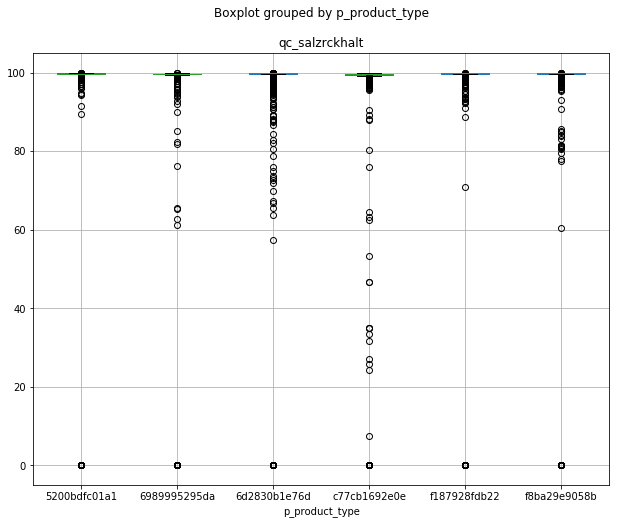

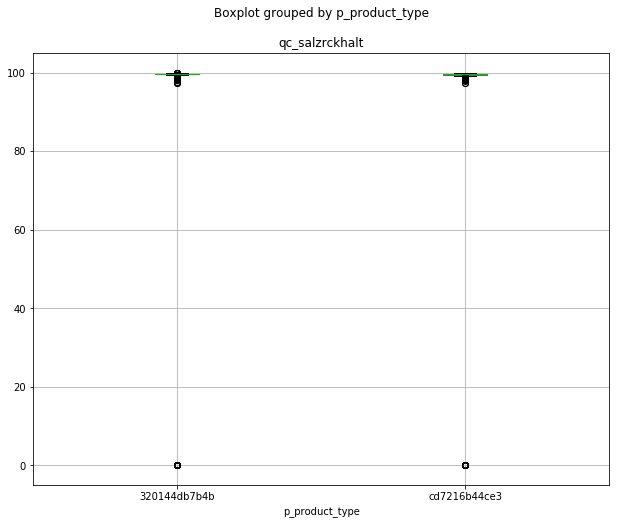

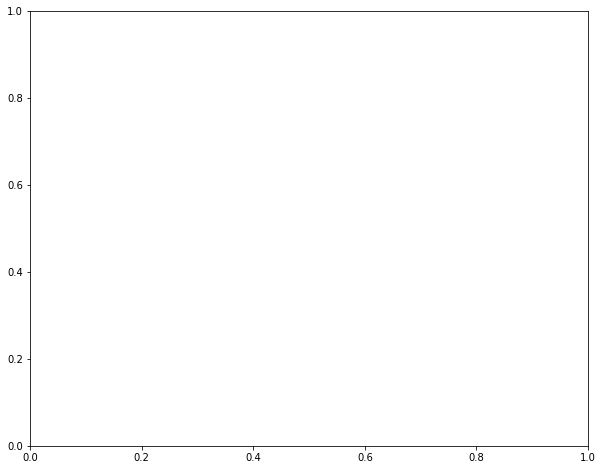

In [26]:
for gr in u_pgroup:
    XY[XY['p_product_group']==gr].boxplot(column='qc_salzrckhalt',by='p_product_type')